# Descriptive Statistics in Data Science

Descriptive statistics is a crucial tool in data science for summarizing and gaining insights from data. 
This notebook demonstrates how to use descriptive statistics to analyze and prepare data for further analysis.
We will use the Iris dataset to showcase these techniques.

## Why is Descriptive Statistics Important?
    1. Summarizing Data: Measures of central tendency like mean, median, and mode help us understand the central point of our data.
    2. Identifying Outliers: Tools like box plots and range analysis help us spot any abnormal or extreme data points.
    3. Understanding Data Distribution: By calculating standard deviation, variance, skewness, and kurtosis, we can assess the spread and shape of our data distribution.
    4. Data Preparation: Before jumping into complex analysis or modeling, understanding the basic statistics helps in data cleaning and feature selection.

## Loading the Iris Dataset

In this cell, we load the Iris dataset, which contains observations of iris flowers with features: 
sepal length, sepal width, petal length, petal width, and a species label.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, expon, gamma


# Load the Iris dataset
df = sns.load_dataset('iris')
df = df.dropna()  # Drop rows with missing values for simplicity

# Display the first few rows of the dataset
print("First 5 rows of the Iris dataset:")
df.head()

First 5 rows of the Iris dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PAY ATTENTION !!!!

You can not run the following cell and look at the data. I have placed the following cell so that there are two columns for checking skewed and kurtosed data.

In [2]:
# ## Generate Synthetic Data Function
def generate_and_append_synthetic_data(df_name, target_column='species'):
    """
    Generate synthetic data with specified skewness and kurtosis, then append it to the given DataFrame.

    Parameters:
    df_name (pd.DataFrame): The DataFrame to which synthetic data will be appended.

    Returns:
    pd.DataFrame: The combined DataFrame with synthetic data appended.
    """
    np.random.seed(42)  # For reproducibility

    # Generate synthetic data
    synthetic_skewed = expon.rvs(scale=2, size=df.shape[0])  # Skewed data
    synthetic_kurtosed = gamma.rvs(a=5, size=df.shape[0])    # High kurtosis data

    # Create DataFrame for synthetic data
    df_synthetic = pd.DataFrame({
        'skewed_data': synthetic_skewed,
        'kurtosed_data': synthetic_kurtosed
    })

    # Append synthetic data to the original DataFrame
    combined_df = pd.concat([df_name, df_synthetic], axis=1)

    # Move the target column to the last position
    feature_columns = [col for col in combined_df.columns if col != target_column]
    sorted_columns = feature_columns + [target_column]
    combined_df = combined_df[sorted_columns]
    
    return combined_df

# Append synthetic data to the Iris dataset
df = generate_and_append_synthetic_data(df)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,skewed_data,kurtosed_data,species
0,5.1,3.5,1.4,0.2,0.938536,4.263332,setosa
1,4.9,3.0,1.4,0.2,6.020243,5.348864,setosa
2,4.7,3.2,1.3,0.2,2.633491,7.596384,setosa
3,4.6,3.1,1.5,0.2,1.825885,6.486784,setosa
4,5.0,3.6,1.4,0.2,0.339250,8.400320,setosa


In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,skewed_data,kurtosed_data,species
0,5.1,3.5,1.4,0.2,0.938536,4.263332,setosa
1,4.9,3.0,1.4,0.2,6.020243,5.348864,setosa
2,4.7,3.2,1.3,0.2,2.633491,7.596384,setosa
3,4.6,3.1,1.5,0.2,1.825885,6.486784,setosa
4,5.0,3.6,1.4,0.2,0.339250,8.400320,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.075169,5.589365,virginica
146,6.3,2.5,5.0,1.9,1.880984,5.167694,virginica
147,6.5,3.0,5.2,2.0,1.397039,4.693922,virginica
148,6.2,3.4,5.4,2.3,0.105702,4.719815,virginica


## Generating Descriptive Statistics

In this cell, we generate and display the descriptive statistics for the numerical features of the Iris dataset.
Descriptive statistics provide insights into the distribution and spread of the data.

In [4]:
# Generate Descriptive Statistics
print("\nDescriptive statistics for numerical features:")
df.describe()


Descriptive statistics for numerical features:


,sepal_length,sepal_width,petal_length,petal_width,skewed_data,kurtosed_data
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.846039,5.069399
std,0.828066,0.435866,1.765298,0.762238,1.834569,2.307443
min,4.300000,2.000000,1.000000,0.100000,0.011075,0.582849
25%,5.100000,2.800000,1.600000,0.300000,0.483615,3.358002
50%,5.800000,3.000000,4.350000,1.300000,1.189026,4.804948
75%,6.400000,3.300000,5.100000,1.800000,2.771497,6.203243
max,7.900000,4.400000,6.900000,2.500000,8.668293,18.917845


## Calculating Skewness and Kurtosis

Skewness and kurtosis are measures of the distribution of the data.
Skewness indicates asymmetry, and kurtosis measures the heaviness of tails.
We calculate these metrics for each numeric feature in the dataset.

In [5]:
# Calculate Skewness and Kurtosis
numeric_cols = df.select_dtypes(include=[float, int])
skewness = numeric_cols.apply(lambda x: skew(x.dropna()))
kurtosis_values = numeric_cols.apply(lambda x: kurtosis(x.dropna()))

print("\nSkewness of Numeric Features:")
print(skewness)

print("\nKurtosis of Numeric Features:")
print(kurtosis_values)


Skewness of Numeric Features:
sepal_length     0.311753
sepal_width      0.315767
petal_length    -0.272128
petal_width     -0.101934
skewed_data      1.402214
kurtosed_data    1.806265
dtype: float64

Kurtosis of Numeric Features:
sepal_length    -0.573568
sepal_width      0.180976
petal_length    -1.395536
petal_width     -1.336067
skewed_data      1.477784
kurtosed_data    7.744331
dtype: float64


## Visualizing Outliers with Boxplots

Boxplots help visualize the distribution of the data and identify potential outliers.
In this cell, we create boxplots for each feature in the Iris dataset to understand the spread and detect any outliers.

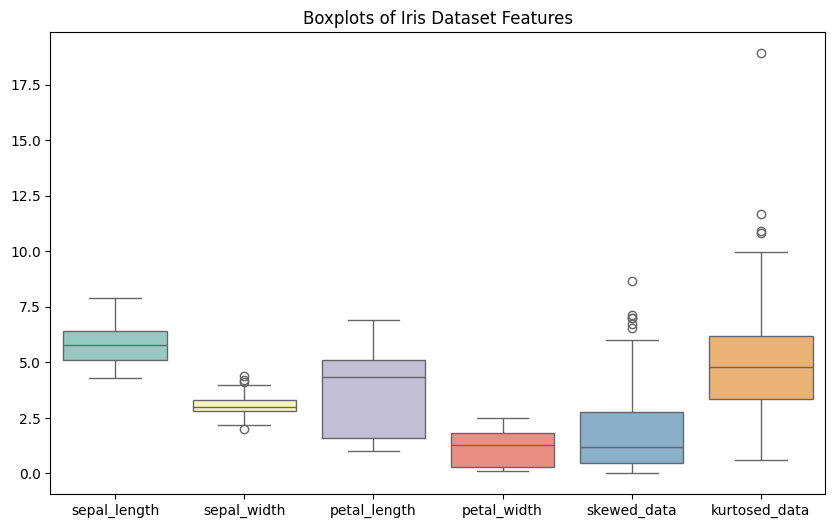

In [6]:
# Boxplot for visualizing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, :-1], palette="Set3")
plt.title('Boxplots of Iris Dataset Features')
plt.show()

## Scatter Plot Matrix

Scatter plot matrices help in visualizing relationships between features.
In this cell, we generate a pairplot to see how features relate to one another and how they differ by species.

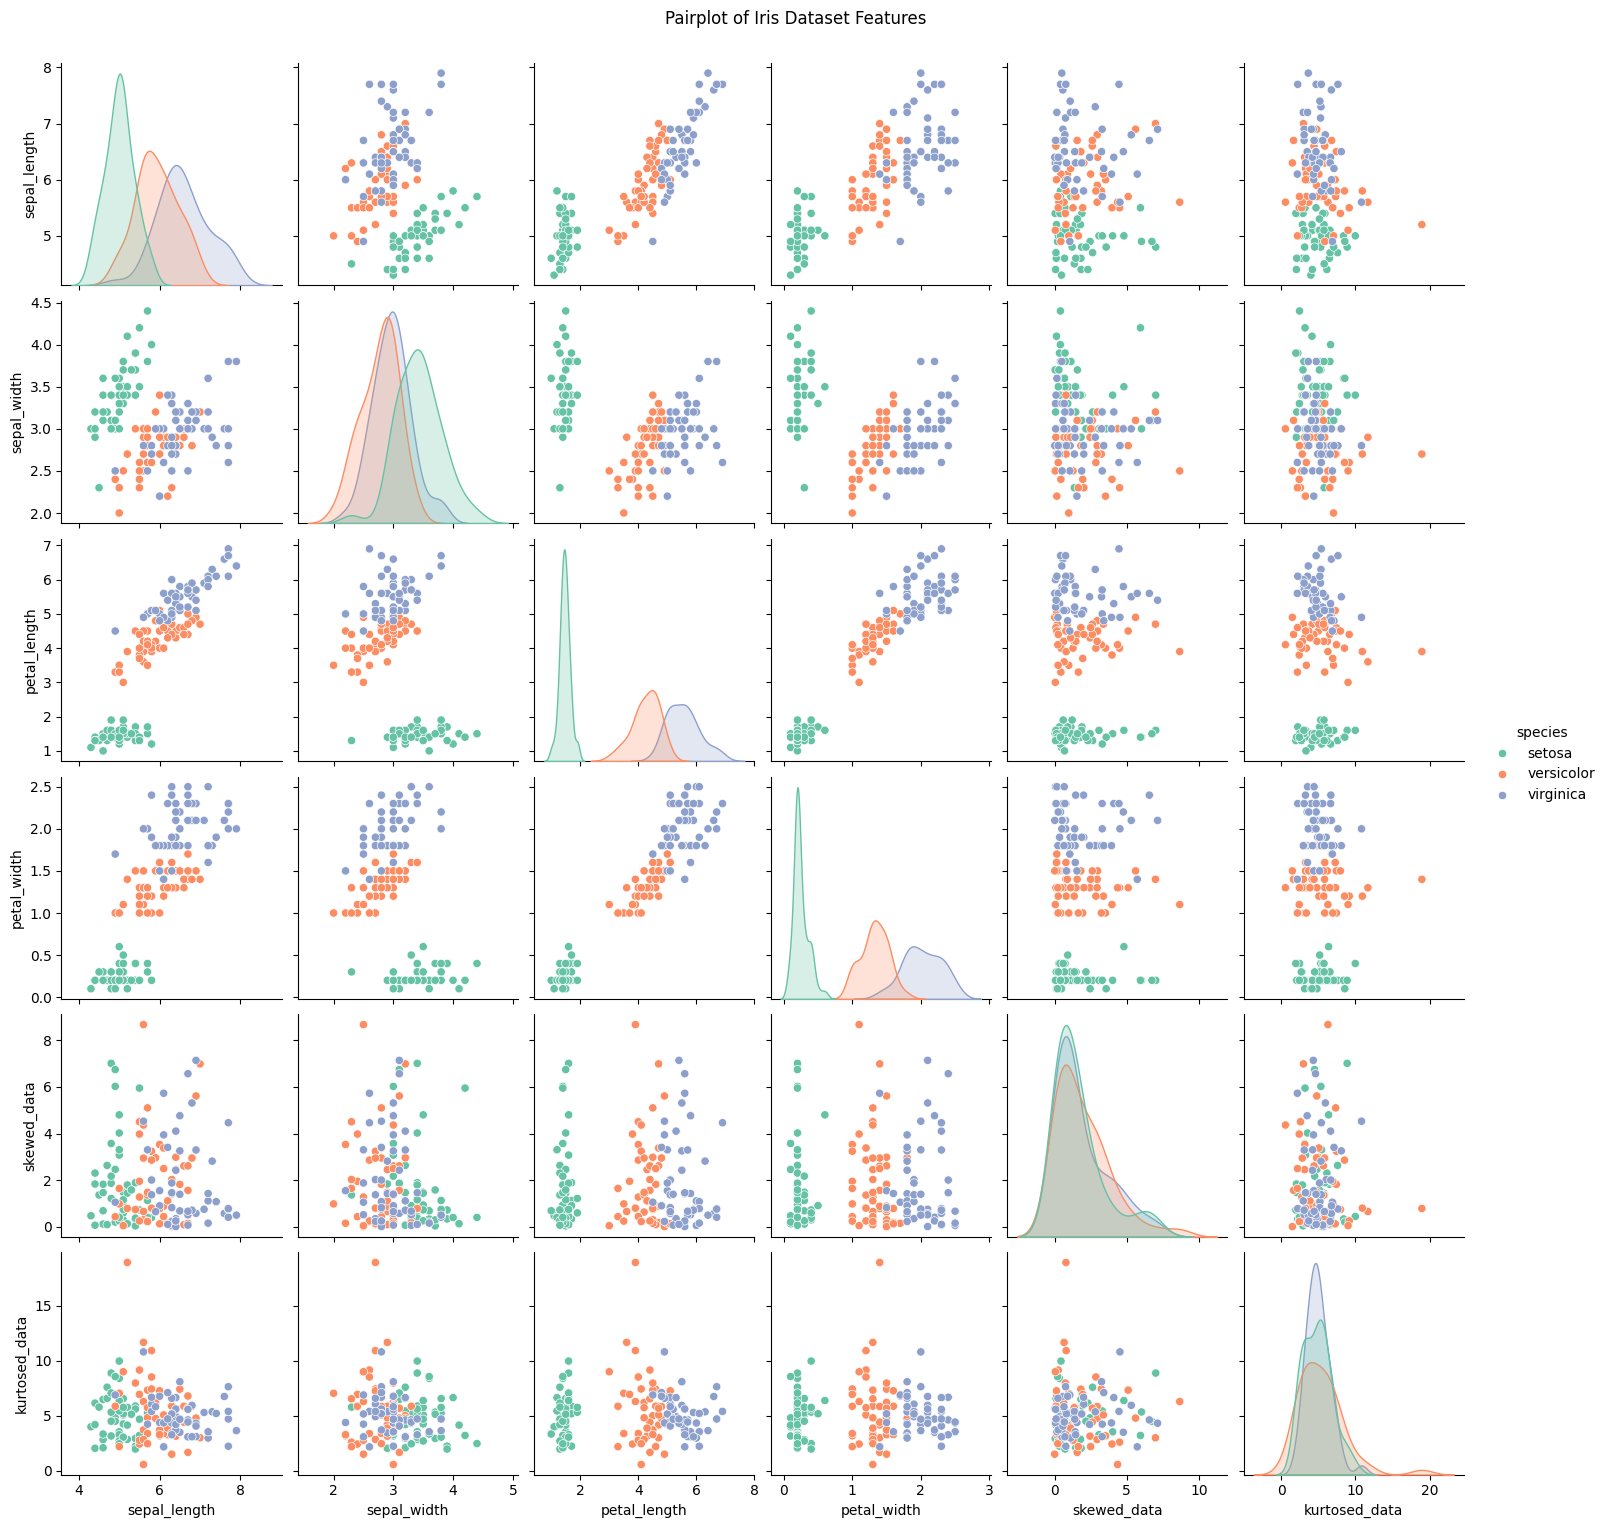

In [7]:
# Scatter plot matrix to visualize relationships between features
sns.pairplot(df, hue="species", palette="Set2")
plt.suptitle('Pairplot of Iris Dataset Features', y=1.02)
plt.show()

## Identifying Potential Outliers Using Z-score

The Z-score method detects outliers based on how many standard deviations a value is from the mean.
In this cell, we calculate the Z-scores and identify potential outliers.

In [8]:
# Identifying potential outliers using z-score
from scipy import stats
import numpy as np

# Assuming the dataset is normally distributed, we calculate z-scores
z_scores = np.abs(stats.zscore(numeric_cols))

# Setting a threshold to identify outliers (e.g., z > 2)
outliers = (z_scores > 2).any(axis=1)
print("\nPotential outliers based on z-score (z > 2):")
print(df[outliers].head())


Potential outliers based on z-score (z > 2):
    sepal_length  sepal_width  petal_length  petal_width  skewed_data  \
1            4.9          3.0           1.4          0.2     6.020243   
11           4.8          3.4           1.6          0.2     7.007115   
14           5.8          4.0           1.2          0.2     0.401358   
15           5.7          4.4           1.5          0.4     0.405223   
26           5.0          3.4           1.6          0.4     0.445472   

    kurtosed_data species  
1        5.348864  setosa  
11       8.879510  setosa  
14       6.653899  setosa  
15       2.480733  setosa  
26       9.968927  setosa  


## Outlier Detection Method Selection

This cell determines which outlier detection method to use for each column based on skewness and kurtosis.
If skewness is high or kurtosis is high, the IQR method is used; otherwise, the Mean ± Std method is applied.


Processing column: sepal_length
  Using Mean ± Std method
  Detected 6 outliers in column: sepal_length


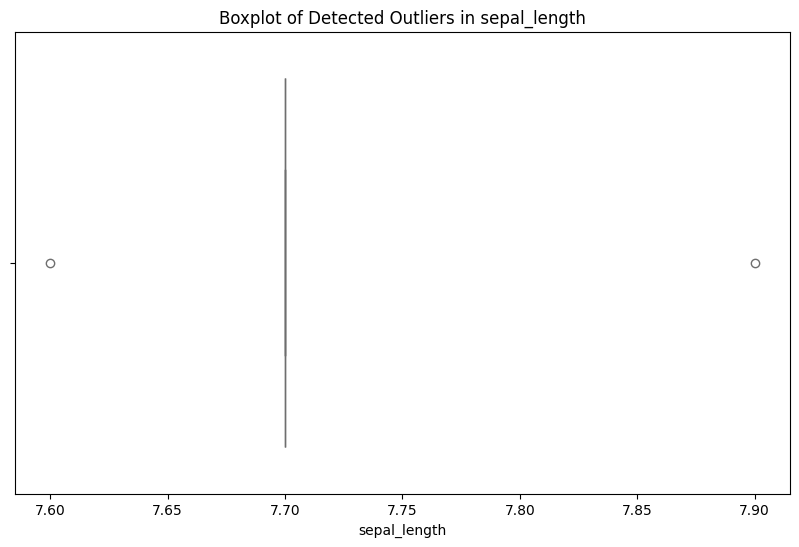


Processing column: sepal_width
  Using Mean ± Std method
  Detected 5 outliers in column: sepal_width


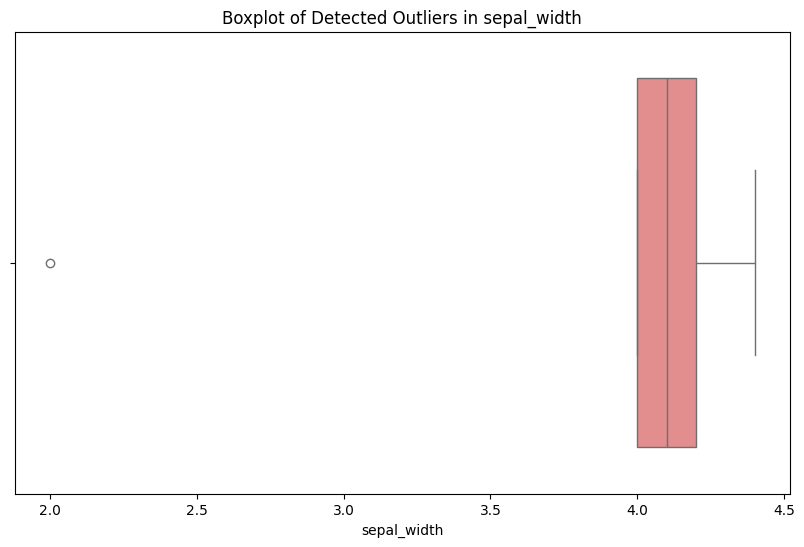


Processing column: petal_length
  Using Mean ± Std method

Processing column: petal_width
  Using Mean ± Std method

Processing column: skewed_data
  Using IQR method
  Detected 6 outliers in column: skewed_data


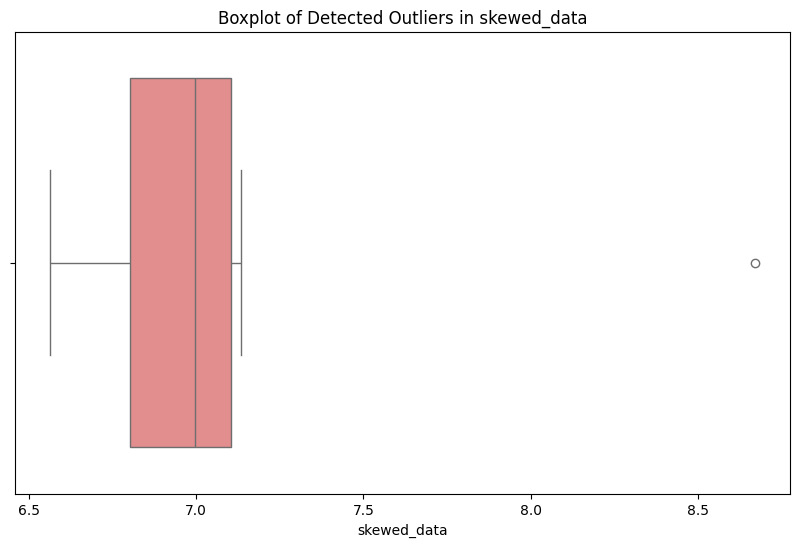


Processing column: kurtosed_data
  Using IQR method
  Detected 4 outliers in column: kurtosed_data


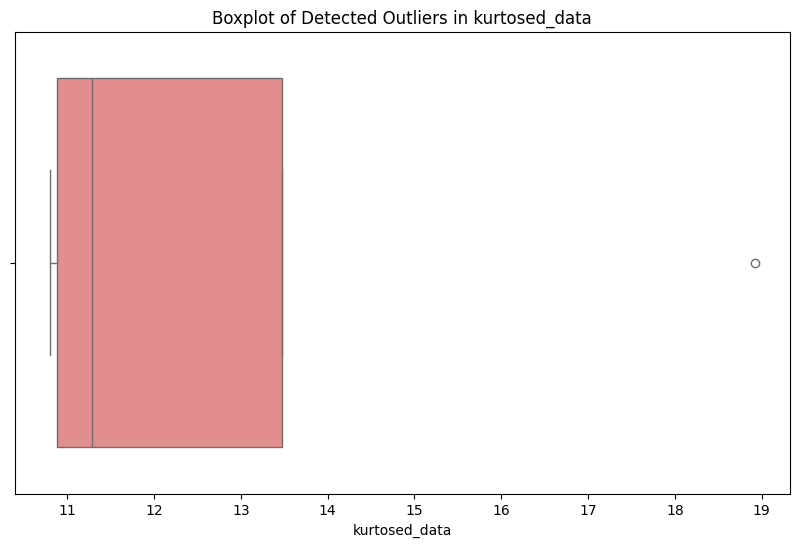


Overall potential outliers detected across all columns:
    sepal_length  sepal_width  petal_length  petal_width  skewed_data  \
11           4.8          3.4           1.6          0.2     7.007115   
14           5.8          4.0           1.2          0.2     0.401358   
15           5.7          4.4           1.5          0.4     0.405223   
32           5.2          4.1           1.5          0.1     0.134528   
33           5.5          4.2           1.4          0.2     5.947376   

    kurtosed_data species  
11       8.879510  setosa  
14       6.653899  setosa  
15       2.480733  setosa  
32       4.156386  setosa  
33       3.220442  setosa  


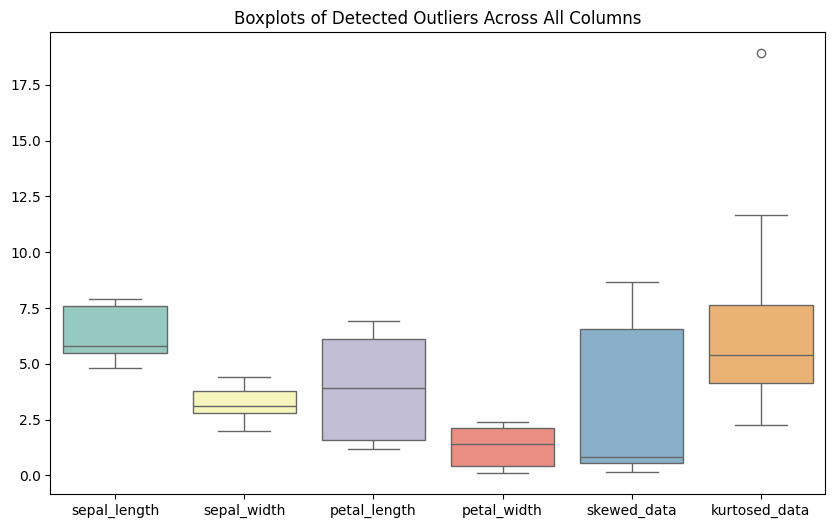

In [9]:
# Determine Outlier Detection Method for Each Column
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
    return is_outlier

def detect_outliers_mean_std(data, multiplier=3):
    mean = data.mean()
    std = data.std()
    is_outlier = (data < (mean - multiplier * std)) | (data > (mean + multiplier * std))
    return is_outlier

outliers_dict = {}
for column in numeric_cols.columns:
    col_skew = skewness[column]
    col_kurt = kurtosis_values[column]
    print(f"\nProcessing column: {column}")
    
    # Determine the method based on skewness and kurtosis
    if abs(col_skew) > 0.5 or col_kurt > 1:
        print("  Using IQR method")
        outliers = detect_outliers_iqr(numeric_cols[column])
    else:
        print("  Using Mean ± Std method")
        multiplier = 2  # Customizable multiplier
        outliers = detect_outliers_mean_std(numeric_cols[column], multiplier=multiplier)
    
    outliers_dict[column] = outliers
    
    # Display and visualize outliers for the current column
    if outliers.any():
        print(f"  Detected {outliers.sum()} outliers in column: {column}")

        plt.figure(figsize=(10, 6))
        sns.boxplot(x=numeric_cols[column][outliers], color='lightcoral')
        plt.title(f'Boxplot of Detected Outliers in {column}')
        plt.show()

# Optional: Combine outliers from all columns for a comprehensive view
combined_outliers = pd.DataFrame(outliers_dict).any(axis=1)
print(f"\nOverall potential outliers detected across all columns:")
print(df[combined_outliers].head())

# Plotting potential outliers for combined columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_cols[combined_outliers], palette="Set3")
plt.title(f'Boxplots of Detected Outliers Across All Columns')
plt.show()

## Feature Engineering Based on Descriptive Statistics

In this cell, we create new features based on insights from skewness and kurtosis:
- Log transformation for highly skewed features
- Squared and cubed features for high kurtosis

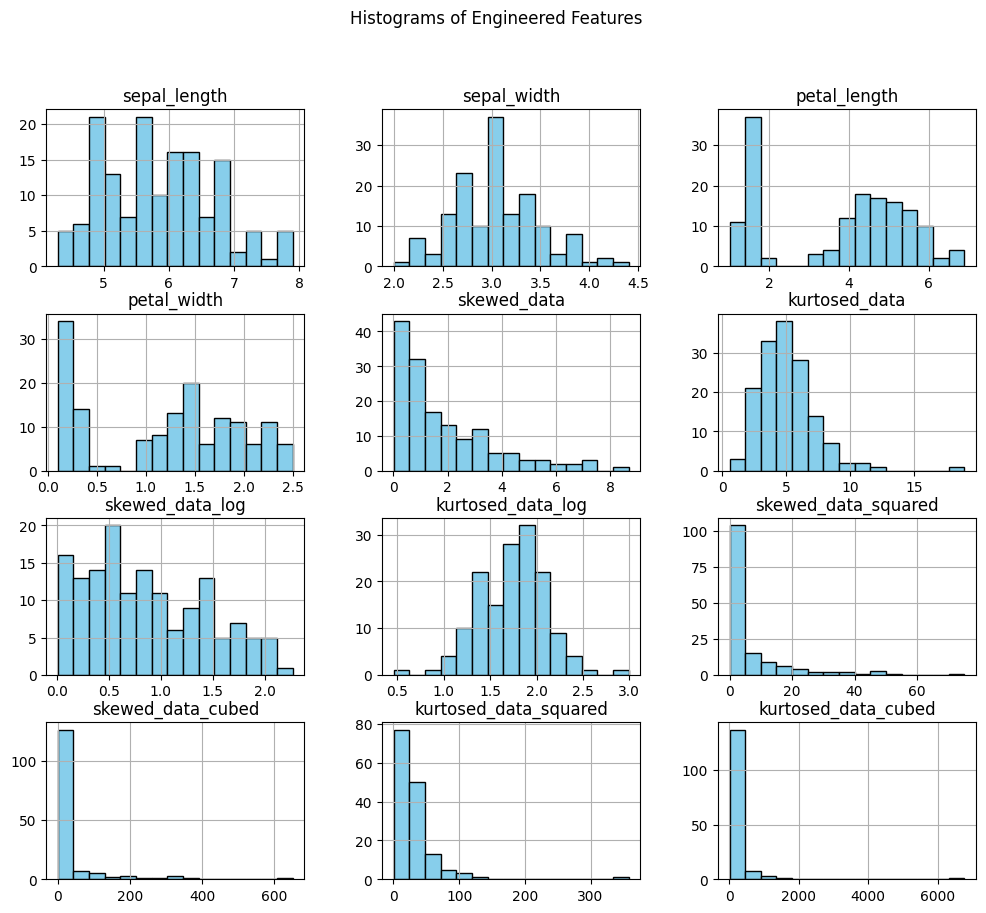


Dataset with New Features:
   sepal_length  sepal_width  petal_length  petal_width  skewed_data  \
0           5.1          3.5           1.4          0.2     0.938536   
1           4.9          3.0           1.4          0.2     6.020243   
2           4.7          3.2           1.3          0.2     2.633491   
3           4.6          3.1           1.5          0.2     1.825885   
4           5.0          3.6           1.4          0.2     0.339250   

   kurtosed_data species  skewed_data_log  kurtosed_data_log  \
0       4.263332  setosa         0.661933           1.660764   
1       5.348864  setosa         1.948798           1.848276   
2       7.596384  setosa         1.290194           2.151342   
3       6.486784  setosa         1.038822           2.013139   
4       8.400320  setosa         0.292110           2.240744   

   skewed_data_squared  skewed_data_cubed  kurtosed_data_squared  \
0             0.880850           0.826710              18.175997   
1            36.24

In [10]:
# Create new features based on skewness and kurtosis insights
for column in numeric_cols.columns:
    if abs(numeric_cols[column].skew()) > 0.5:
        new_col_name = f'{column}_log'
        df[new_col_name] = np.log1p(df[column])  # log1p to handle zero values

for column in numeric_cols.columns:
    if numeric_cols[column].kurtosis() > 1:
        new_col_name_squared = f'{column}_squared'
        new_col_name_cubed = f'{column}_cubed'
        df[new_col_name_squared] = df[column] ** 2
        df[new_col_name_cubed] = df[column] ** 3

# Visualize new features to check their distribution
df.hist(figsize=(12, 10), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Engineered Features')
plt.show()

# Print the first few rows of the dataset with the new features
print("\nDataset with New Features:")
print(df.head())